# SC42150 - Statistical Signal Processing
## Python Assignment I: Stock Market Analysis

#### Team members

- Abina Boesjes (student number):
- Luca de Laat (4135040):

---

## Introduction

The goal of this assignment is to help you get a more practical understanding of some of the concepts of Statistical Signal Processing. Specifically, you will work with stochastic processes and determine their moments, stationarity and ergodicity properties, and also try to detrend the data.

In order to achieve those objectives, you will use the Python programming language, and specifically the modules numpy, scipy (for numerical processing) and matplotlib (for plotting). In case you are completely unfamiliar with Python, you should learn the basics before attempting this exercise. You are allowed to use numpy's implementations of common routines, such as mean or cov amongst other, but if you do so make sure you have read the documentation and are sure that they accomplish exactly what is taught in the lecture notes, as sometimes there are small differences in definitions and implementations. 

Finally, you are also going to use the Jupyter Notebook file format, which might require installing some dependencies on your system. You can find instructions on installing Jupyter [here](https://jupyter.org/install).

## Reporting

The report of this python exercise consists of this Jupyter Notebook file, with your answers added after each question. Answers will consist of code and/or text (markdown) cells. Please use the already indicated cells and format. You will **also** need to deliver a `PDF` version of this file.

In order to create a PDF version of this file, go to the top left, click on `File` then `Export Notebook As` and Choose `PDF`.
If this feature is not supported by your system, you can also choose `LaTeX`.
Then, you can use your preferred `LaTeX` compiler to create the `PDF`. After generation you PDF report, please double check if all answers/plots are correctly displayed.

Moreover, you will also need to send the `.npy` file with the signals used in this exercise. Don't forget to edit your team member's name and student number above. You will submit one Jupyter notebook per team.

## Stock market analysis

Lately you've been fascinated by the world of trading so you decided to learn more about it and see if you can learn any good strategies by examining the trading data and looking for patterns.

You are given a `.npy` file containing historical price data of various stocks. We will make the assumption that all the timeseries are just different realizations of the same stochastic process.

You will need to conduct the following steps to complete your investigation, each of which is worth 1 point:

1. Import the `.npy` file provided using `np.load()` as indicated below. You should now have access to a $N\times K$ array, containing $K$ timeseries of historical price data of various stocks, each of length $N$. Plot the first one and also, in a new figure, plot the first 100 of them together.

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

with open('data.npy', 'rb') as f:
    t = np.load(f)
    S = np.load(f)

print(f"t has size {t.shape}")
print(f"t =\n{t}\n")

print(f"S hase size {S.shape}")
print(f"S =\n{S}")

t has size (100,)
t =
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]

S hase size (100, 10000)
S =
[[1.         1.         1.         ... 1.         1.         1.        ]
 [0.91650571 0.99807028 0.97772982 ... 0.95425816 0.9996188  1.04944731]
 [1.02151521 1.10807792 0.94494465 ... 0.96495276 1.0059257  1.07944192]
 ...
 [1.38640469 4.33953127 2.36383675 ... 5.44151941 1.26135267 2.52742654]
 [1.45187864 4.20481319 2.36533139 ... 5.47849824 1.26483132 2.53404437]
 [1.36963207 4.10436473 2.38333649 ... 5.42398568 1.24618577 2.55307366]]


Text(0, 0.5, 'Price')

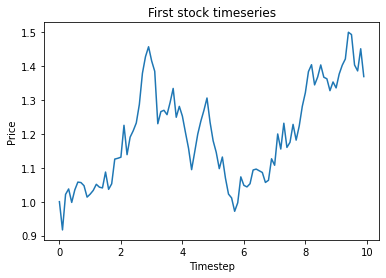

In [139]:
fig1 = plt.plot(t,S[:,0])
plt.title('First stock timeseries')
plt.xlabel('Timestep')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

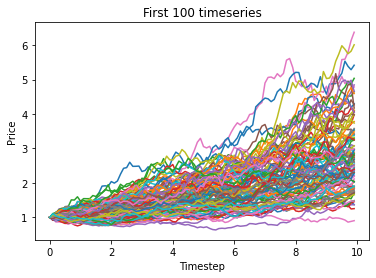

In [140]:
fig2 = plt.plot(t,S[:,:100])
plt.title('First 100 timeseries')
plt.xlabel('Timestep')
plt.ylabel('Price')

We will denote the generating stochastic process with $S_{n}\sim f_{S_{n}}$, where $n=t\Delta t$ refers to the time index. Further, we will denote its $k$-th realization with $S_{n}^{k}$.

2. Compute the ensemble mean and variance and plot each one.

Text(0.5, 0, 'Timestep')

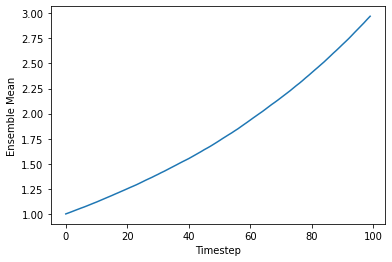

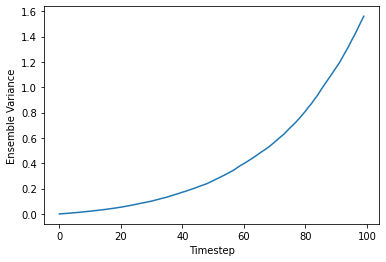

In [141]:
# Compute mean and variance for all stocks at each timestep i.e. row of S
ens_mean = np.mean(S,axis=1)
ens_var = np.var(S,axis=1)

fig3 = plt.figure()
plt.plot(ens_mean)
plt.ylabel('Ensemble Mean')
plt.xlabel('Timestep')

fig4 = plt.figure()
plt.plot(ens_var)
plt.ylabel('Ensemble Variance')
plt.xlabel('Timestep')

3. Compute the correlation matrix $R_{S}$ and visualize it using the `plt.matshow()` command. What can you deduce from that plot?

[[ 10000.          10112.52300834  10228.82702418 ...  29048.38369912
   29384.75884254  29705.66989497]
 [ 10112.52300834  10243.30111965  10361.21622256 ...  29416.9110003
   29756.82744483  30082.31097513]
 [ 10228.82702418  10361.21622256  10498.1603455  ...  29796.92485766
   30141.83019953  30471.13445941]
 ...
 [ 29048.38369912  29416.9110003   29796.92485766 ...  98991.36713334
  100138.98141136 101221.08792713]
 [ 29384.75884254  29756.82744483  30141.83019953 ... 100138.98141136
  101468.51612629 102562.653578  ]
 [ 29705.66989497  30082.31097513  30471.13445941 ... 101221.08792713
  102562.653578   103846.44105093]]


<Figure size 432x288 with 0 Axes>

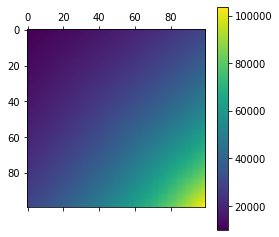

In [142]:
[rS, cS] = S.shape # rows of S, columns of S

# Correlation over timesteps
R1 = np.ndarray([rS, rS])

for ii, time1 in enumerate(S):
    for jj, time2 in enumerate(S):
        R1[ii, jj] = np.correlate(time1,time2)

figR1 = plt.figure()
im = plt.matshow(R1)
plt.colorbar(im)

print(R1)

[[ 145.48086337  315.04379474  230.84462048 ...  355.17956463
   115.70783308  194.45861374]
 [ 315.04379474  776.37879909  542.7500808  ...  880.33355901
   262.21172264  453.36506067]
 [ 230.84462048  542.7500808   397.37074481 ...  620.15034397
   190.10053029  322.99473956]
 ...
 [ 355.17956463  880.33355901  620.15034397 ... 1017.2990857
   294.4888247   512.49854504]
 [ 115.70783308  262.21172264  190.10053029 ...  294.4888247
    95.88367947  159.30928635]
 [ 194.45861374  453.36506067  322.99473956 ...  512.49854504
   159.30928635  272.85918618]]


<Figure size 432x288 with 0 Axes>

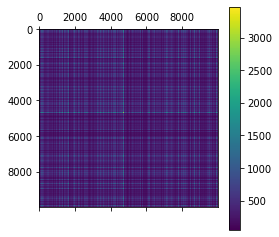

In [143]:
# COMPUTATIONALLY DEMANDING 
# Correlation over stocks
R2 = np.ndarray([cS, cS])

for ii, stock1 in enumerate(S.T): 
    for jj, stock2 in enumerate(S.T):
        R2[ii, jj] = np.correlate(stock1,stock2)

figR2 = plt.figure()
im = plt.matshow(R2)
plt.colorbar(im)
print(R2)

> Enter answer here.

4. Can you determine whether the process $S_{n}$ is WSS or not? Explain why.

> Enter answer here.


A friend of yours who has been into trading for some time now, briefly looks at the data and tells you that the stock price changes can be explained by asset model like the following:
$$
    S_{n+1}=S_{n}e^{(\mu-0.5\sigma^{2})\Delta t+\sigma\sqrt{\Delta t}Z_{n}},\quad Z_{n}\sim\mathcal{N}(0,1)
    \label{asset_model} \tag{1}
$$
However, you have no idea what this model represents and what values the parameters $\mu$ and $\sigma$ should take. By inspecting the data you can at least infer that $\Delta t=0.1$ time units, so that's a start.

In your efforts to make sense of ([1](#mjx-eqn-asset_model)), you notice that if you divide $S_{n+1}$ by $S_{n}$ and then take the logarithm you end up with

$$
    \log \left( \frac{S_{n+1}}{S_{n}} \right) = (\mu-0.5\sigma^{2})\Delta t+\sigma\sqrt{\Delta t}Z_{t}
    \label{tf_asset_model} \tag{2}
$$

This looks promising so you decide to try this transformation on the data you have.

5. Apply the transformation $X_{n+1}=\log\left(S_{n+1}/S_{n}\right)$ to your data, compute the ensemble mean and variance and plot them.

Text(0.5, 0, 'Timestep')

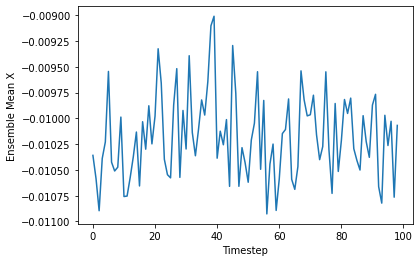

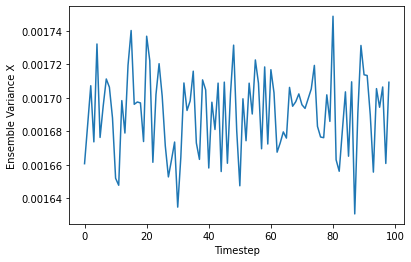

In [144]:
#Initialize X
X = np.ndarray([rS,cS])

for ii, nn in enumerate(S):
    ratio = S[ii-1,:]/nn
    X[ii,:] = np.log(ratio)
    
#print(X)

# Compute mean and variance for all stocks at each timestep i.e. row of X
X_mean = np.mean(X,axis=1)
X_var = np.var(X,axis=1)

fig_Xmean = plt.figure()
plt.plot(X_mean[1:])
plt.ylabel('Ensemble Mean X')
plt.xlabel('Timestep')

fig_Xvar = plt.figure()
plt.plot(X_var[1:])
plt.ylabel('Ensemble Variance X')
plt.xlabel('Timestep')

6. Compute the correlation matrix $R_{X}$ and visualize it as before. Do you notice anything different?

> Enter answer here.

7. Can you determine whether the process $X_{n}$ is WSS? If so, what are its first moments, i.e. mean and variance?

> Enter answer here.

8. Compute and plot the time average for a single realization of $X_{n}$, e.g. for $k=1$. Would you be able to say that $X_{n}$ is ergodic in the mean?

> Enter answer here.

According to ([2](#mjx-eqn-tf_asset_model)), $X_{t}$ should be Gaussian White Noise since $Z_{t}$ is a Gaussian ZMWN. However, since you are only given data, it's good that you verify this. Remember that a stochastic process is Gaussian if the joint distribution of any combination of elements of $X_n$ is Gaussian. For now we will just take two random time instances to verify this, but feel free to try other combinations as well.

9. Take two time instances of $X_{n}$, e.g. for $n=\{30,70\}$, and plot their 2d histogram across $K$ realizations $\{X_{n}^{k}\}_{k=1}^{K}$ by using $\sqrt{K}$ bins. Can you adequately fit a multivariate normal distribution on this histogram?

10. Now verify that the marginals of the above distribution are also Gaussians, that is take the (1d) histograms of the above time instances (with $\sqrt{K}$ bins), plot them, and also fit the correspoding PDFs on top.


From ([1](#mjx-eqn-asset_model)), it follows that the first two statistical moments can be computed analytically:
\begin{align}
    \mathbb{E}\left[S_{n}\right] &= S_{0}e^{\mu n\Delta t} \label{asset_mean} \tag{3}\\
    \text{Var}\left[S_{n}\right] &= S_{0}^{2}e^{2\mu n\Delta t}\left(e^{\sigma^{2}n\Delta t}-1\right) \label{asset_var} \tag{4}
\end{align}
Having computed the ensemble mean and variance of $X_{n}$ you should be able to determine estimates for the values of $\mu$ and $\sigma$.

11. Using the results from Question 7, compute estimates for $\mu$ and $\sigma$. Use those estimates to calculate the moments ([3](#mjx-eqn-asset_mean))-([4](#mjx-eqn-asset_var)) and plot those along with the ensemble moments of $S_{n}$ of Question 2.

12. Having done all the above, you should now be in a position where you can discuss whether the model your friend suggested was good enough to describe the data.

> Enter answer here.